In [1]:
import requests, json
from datetime import datetime, timedelta, timezone
import os
import time 
#from dash import Dash, dcc, html, Input, Output

from dotenv import load_dotenv

import plotly.graph_objects as go
import matplotlib.pyplot as plt
# Load environment variables from .env file
load_dotenv()

api_key= os.getenv('taostats_api')
headers = {
            "accept": "application/json",
            "Authorization": api_key
        }

#colours
ts_teal = '#00DBBC'
ts_red ='#EB5347'
ts_yellow ='#EBC247'
ts_orange ='#FF8B25'
ts_purple ='#D65BB3'
ts_lblue ='#47C6EB'
ts_fusia ='#E82166'
ts_lime ='#BAEB47'
ts_sand ='#EB7347'
ts_dpurple ='#9747FF'
ts_pblue ='#87FFEE'
ts_dgreen ='#007564'
ts_gray ='#909090'
ts_green ='#00B20F'
ts_brown ='#BD7536'
ts_rblue ='#008BDB'
#plot in dark mode
plt.style.use('dark_background')

In [30]:
#get current block

url = "https://api.taostats.io/api/block/v1?page=1&limit=1"
response = requests.get(url, headers=headers)
resJson = json.loads(response.text)
current_block = resJson['data'][0]['block_number']
print(current_block)


7076262


In [31]:
def iterate_endpoint(url):
    data = []
    page = 1
    total_pages = 1
    while page <= total_pages:
        new_url = f"{url}&limit=200&page={page}"
        #print(new_url)
        response = requests.get(new_url, headers=headers)
        resJson = json.loads(response.text)   
        data += resJson['data']
        total_pages = resJson['pagination']['total_pages']
        page +=1
    return data

In [47]:
days = 30
netuid = 64

end_block = current_block
start_block = current_block-days*7200
#print(start_block)
url = f"https://api.taostats.io/api/dtao/burned_alpha/v1?netuid={netuid}&block_start={start_block}&block_end={end_block}"
results = iterate_endpoint(url)
burns = {}
for burn in results:
    time = burn['timestamp']
    day = datetime.fromisoformat(time.replace("Z", "+00:00")).date().isoformat()
    amount = float(burn['amount'])/1e9
    if day not in burns:
        burns[day] = 0
    burns[day] += amount

ordered_days = sorted(burns.keys())      # oldest → newest
ordered_values = [burns[d] for d in ordered_days]

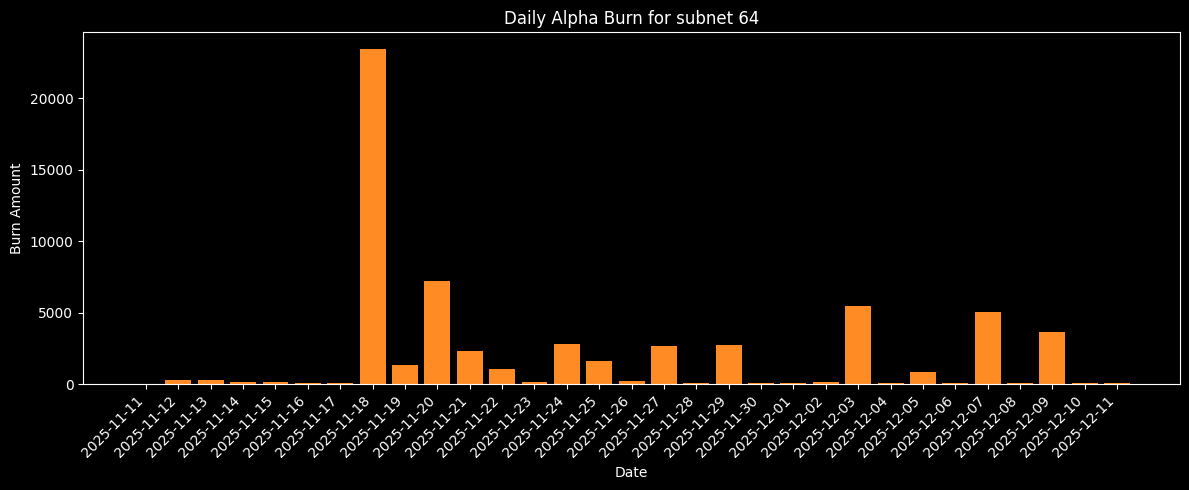

In [49]:
plt.figure(figsize=(12, 5))

plt.bar(ordered_days, ordered_values, color = ts_orange)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Date")
plt.ylabel("Burn Amount")
plt.title(f"Daily Alpha Burn for subnet {netuid}")

plt.tight_layout()
plt.show()
